## HR Analytics classification task EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv('aug_train.csv')

In [3]:
data.shape

(19158, 14)

In [4]:
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [5]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


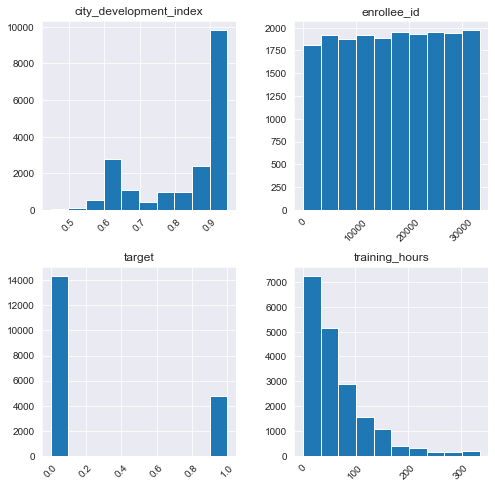

In [6]:
data.hist(figsize=(8,8), xrot=45)
plt.show()

Training hours is really the only numerical variable that seems relevant here.

In [7]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [8]:
data.describe(include='object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


Every categorical feature other than city and relevant_experience have missing values

### Distribution of categorical features

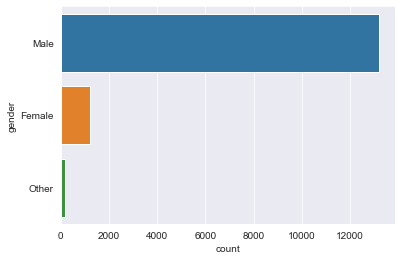

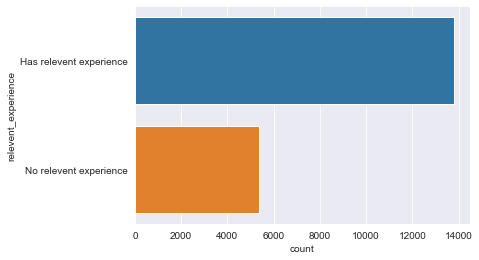

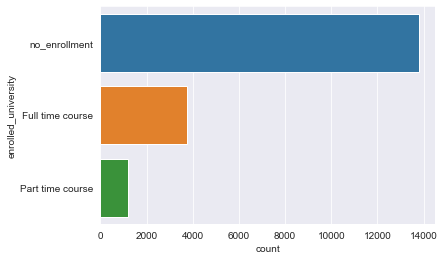

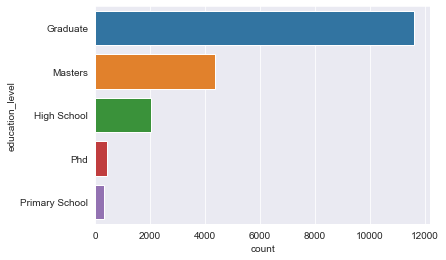

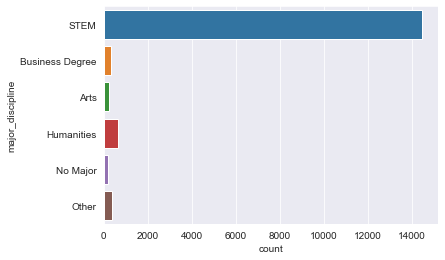

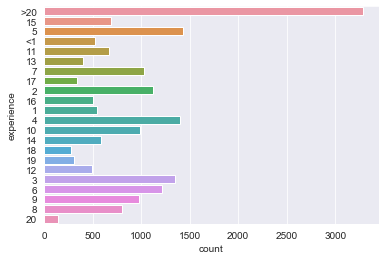

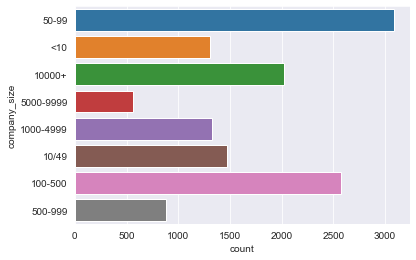

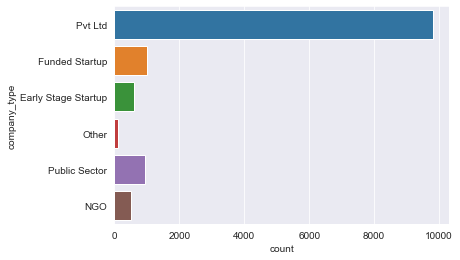

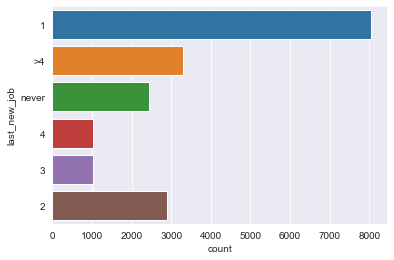

In [9]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 22:
        sns.countplot(y=col, data=data)
        plt.show()

Note that there are missing values in these columns.

#### On the fly data cleaning
We convert experience and last_new_job into numeric features

In [10]:
data['experience_num'] = data['experience'].replace({'>20':'21', '<1': '0'}).astype(float)
data['last_new_job_num'] = data['last_new_job'].replace({'>4':'5','never':'0'}).astype(float)

#### Segment target by numerical features

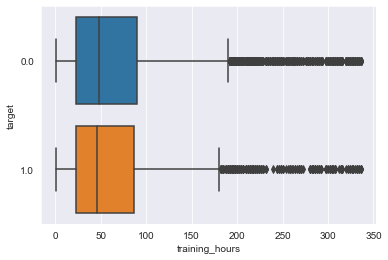

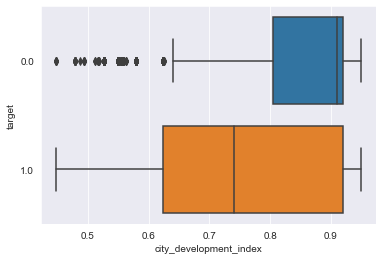

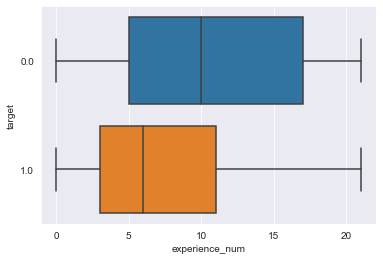

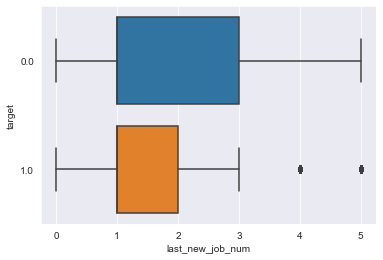

In [11]:
num_cols = ['training_hours','city_development_index', 'experience_num', 'last_new_job_num']
for col in num_cols:
    sns.boxplot(y = data['target'].astype('category'), x = col, data=data)
    plt.show()

The hours trained see to be consitent throughout the classes

### Target feature vs the other categorical features
#### Cross tab
We use crosstab because target here is a numeric feature. If it was categorical, use boxplot or violin plot, as shown further down below

Using crosstab to show tables of target vs categorical features

In [18]:
pd.crosstab(data['target'], data['gender'])

gender,Female,Male,Other
target,,,
0.0,912,10209,141
1.0,326,3012,50


In [19]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <=4:
        display(pd.crosstab(data['target'], data[col], normalize='index'))
        #display(pd.crosstab(data['target'], data[col]))

gender,Female,Male,Other
target,,,
0.0,0.080980,0.90650,0.012520
1.0,0.096222,0.88902,0.014758


relevent_experience,Has relevent experience,No relevent experience
target,,
0.0,0.753147,0.246853
1.0,0.619845,0.380155


enrolled_university,Full time course,Part time course,no_enrollment
target,,,
0.0,0.164754,0.063465,0.771781
1.0,0.307477,0.064890,0.627632


### Target across categorical features

Using only 3 categorical features - those with less than 4 classes

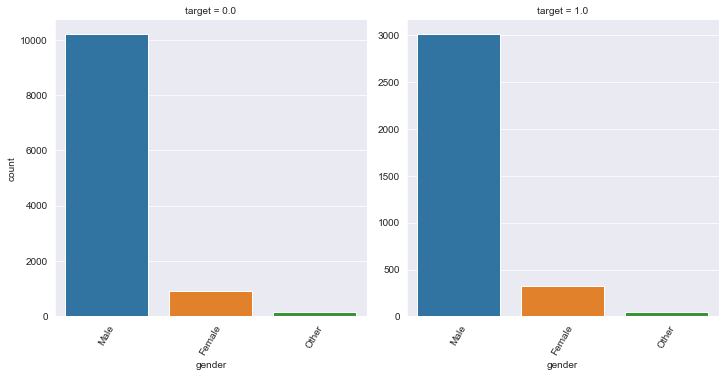

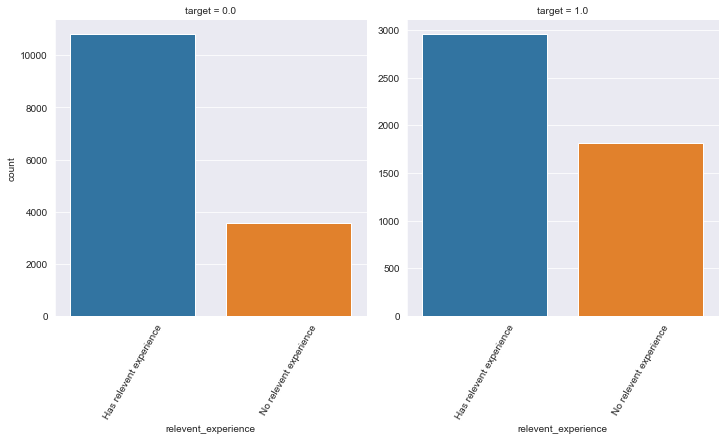

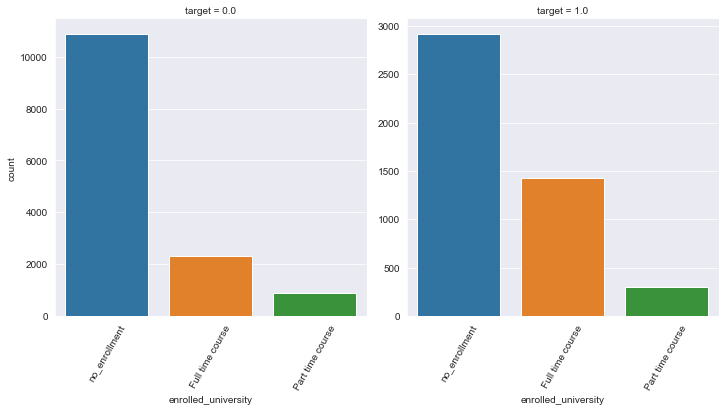

In [14]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 4:
        g = sns.catplot(x = col, kind='count', col = 'target', data=data, sharey=False)
        g.set_xticklabels(rotation=60)

Using all categorical features with classes less than or equal to 22

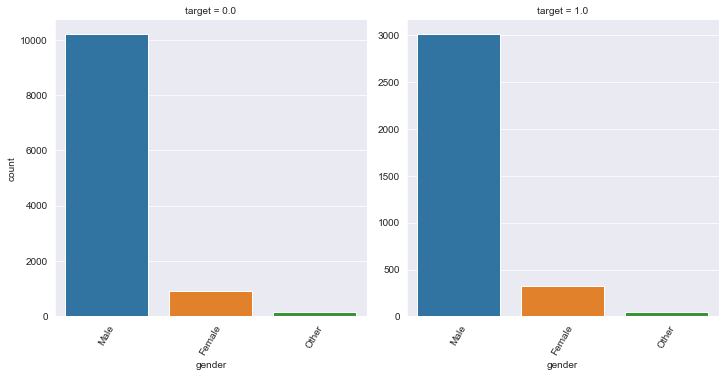

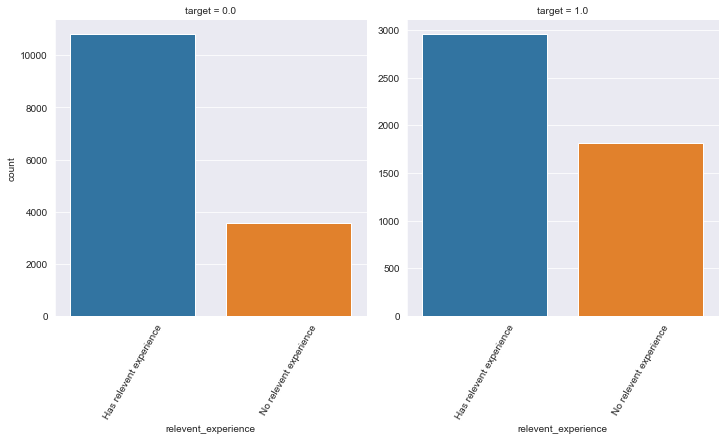

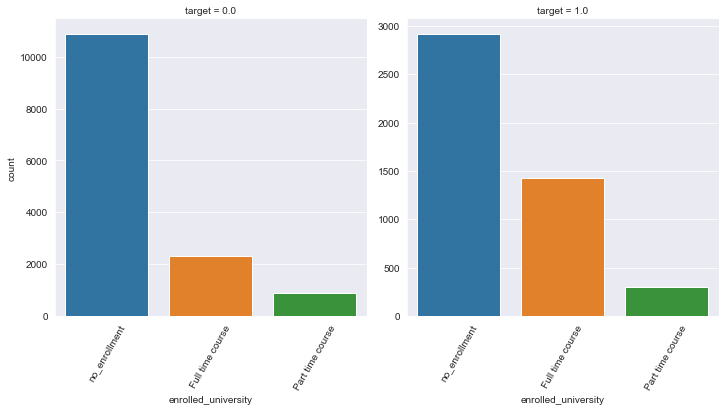

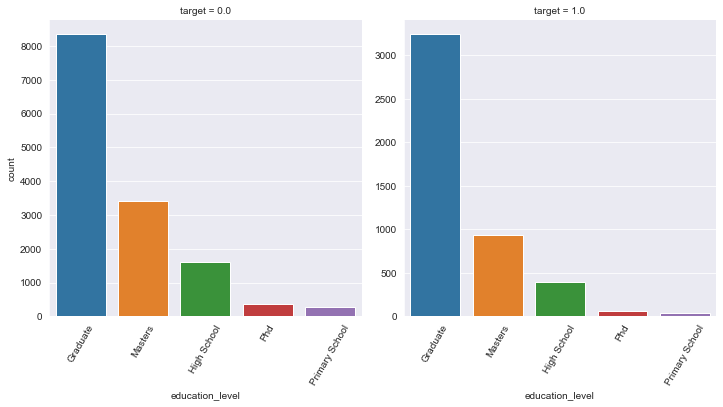

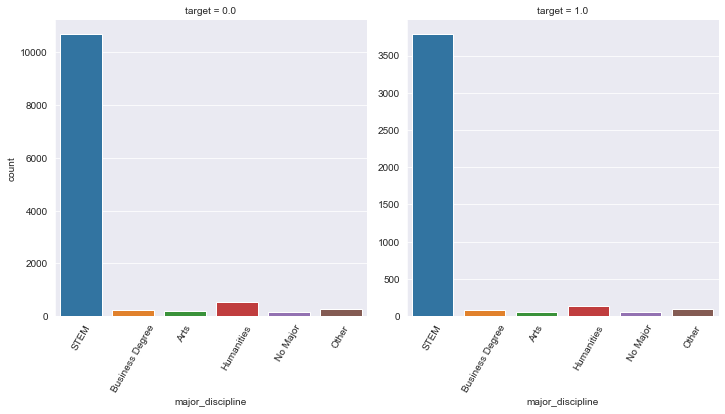

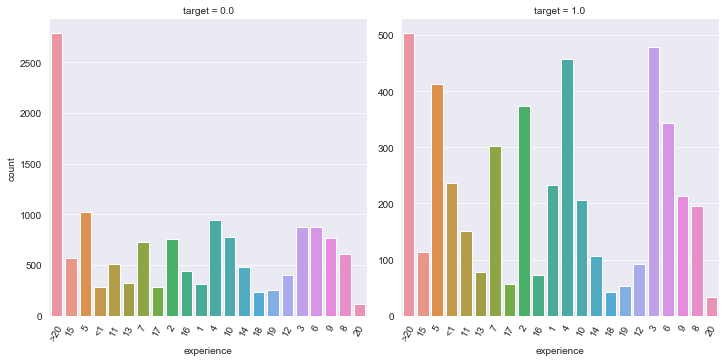

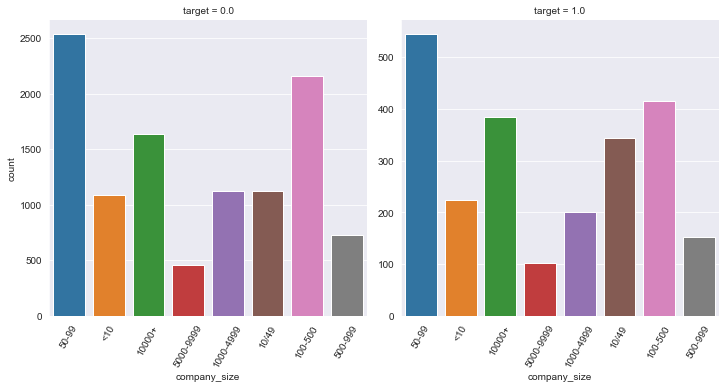

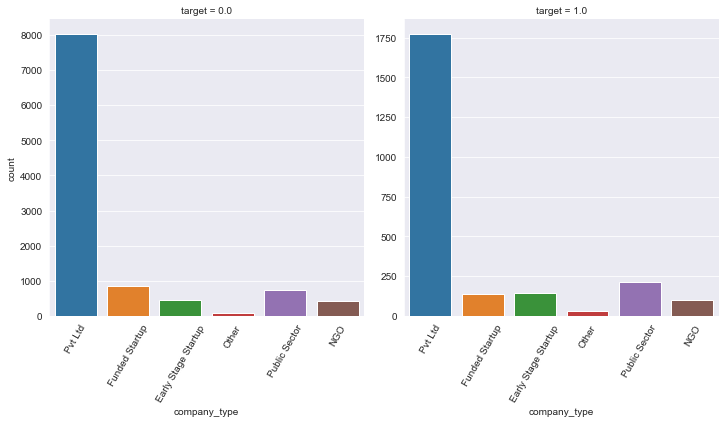

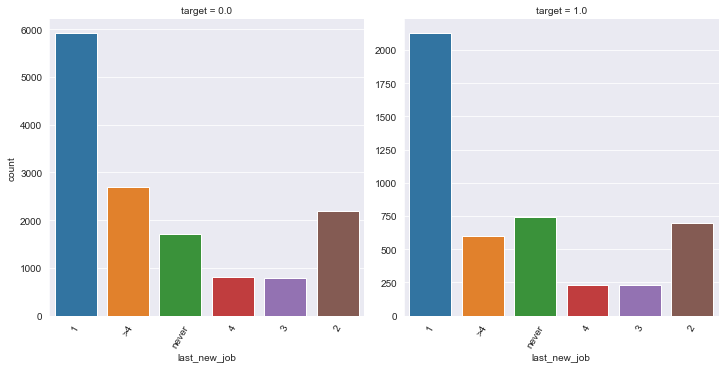

In [23]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 22:
        g = sns.catplot(x = col, kind='count', col = 'target', data=data, sharey=False)
        g.set_xticklabels(rotation=60)

You can also use FacetGrid

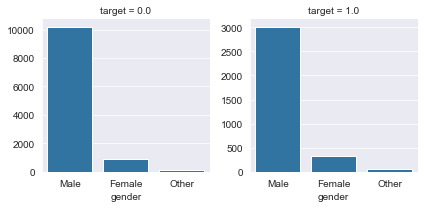

In [16]:
g = sns.FacetGrid(data, col='target', sharey=False)
g.map(sns.countplot, 'gender', order=['Male','Female','Other'])

### All Categorical vs all numeric features

In [12]:
data.groupby('target').mean()

,enrollee_id,city_development_index,training_hours,experience_num,last_new_job_num
target,,,,,
0.0,16601.160907,0.853139,66.113761,10.789734,2.079649
1.0,17700.819971,0.755719,63.118484,8.020194,1.758598


In [20]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 3:
        display(data.groupby(col)[['training_hours', 'target', 'experience_num', 'last_new_job_num']].mean())

,training_hours,target,experience_num,last_new_job_num
gender,,,,
Female,65.636511,0.263328,9.154406,1.947240
Male,65.297633,0.227819,10.863124,2.096328
Other,63.869110,0.261780,9.079787,1.780105


,training_hours,target,experience_num,last_new_job_num
relevent_experience,,,,
Has relevent experience,65.800174,0.214690,11.537605,2.255435
No relevent experience,64.253261,0.338427,6.402806,1.330623


,training_hours,target,experience_num,last_new_job_num
enrolled_university,,,,
Full time course,64.532340,0.380889,5.763447,1.209134
Part time course,67.571786,0.252087,7.980785,1.836332
no_enrollment,65.362018,0.211406,11.548483,2.242733


#### Correlations

In [21]:
corr = data.corr()
corr

,enrollee_id,city_development_index,training_hours,target,experience_num,last_new_job_num
enrollee_id,1.000000,-0.040455,0.000998,0.049475,-0.035509,-0.030693
city_development_index,-0.040455,1.000000,0.001920,-0.341665,0.333967,0.188984
training_hours,0.000998,0.001920,1.000000,-0.021577,0.000908,-0.006276
target,0.049475,-0.341665,-0.021577,1.000000,-0.176724,-0.082607
experience_num,-0.035509,0.333967,0.000908,-0.176724,1.000000,0.479033
last_new_job_num,-0.030693,0.188984,-0.006276,-0.082607,0.479033,1.000000


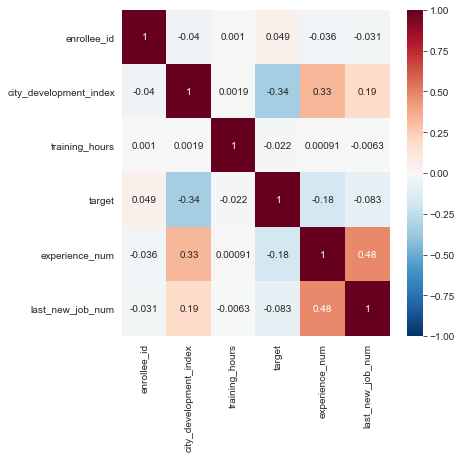

In [22]:
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()